🎯 Desafio dia 69 — Análise de Vendas de Aplicativos

Dataset: desafio_dia_69_vendas_apps.csv

🔍 Contexto: Você está trabalhando com dados de um marketplace de aplicativos. Seu objetivo é analisar o desempenho dos apps e prever quais têm maior chance de gerar alta receita.

Tarefas do desafio:

Tratamento de dados

- Preencha os valores ausentes na coluna avaliacao com a média.

- Preencha os valores ausentes em preco_usd com zero (apps gratuitos).

Análise geral

- Qual categoria de aplicativo tem a maior receita média?

- Qual plataforma possui a maior proporção de apps com sucesso_alto?

Visualização de dados

- Crie um gráfico de barras comparando o total de receita por categoria.

Machine Learning - Classificação

- Crie um modelo para prever se o app será um sucesso_alto, com base em:

    avaliacao, preco_usd, downloads_mil, categoria, plataforma

    Utilize train_test_split, pd.get_dummies e RandomForestClassifier.

    Avalie a performance com accuracy_score.



In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("desafio_dia_69_vendas_apps.csv")
df.head()

,id_app,nome_app,categoria,plataforma,avaliacao,downloads_mil,preco_usd,receita_usd,sucesso_alto
0,1,App_1,Saúde,iOS,3.7,4926,0.00,0.0,0
1,2,App_2,Educação,iOS,3.3,2152,2.99,6434480.0,1
2,3,App_3,Saúde,iOS,4.6,2291,0.00,0.0,0
3,4,App_4,Finanças,iOS,NaN,2865,0.99,2836350.0,1
4,5,App_5,Entretenimento,iOS,4.1,4634,4.99,23123660.0,1


In [6]:
#Preencha os valores ausentes na coluna avaliacao com a média.
df["avaliacao"] = df["avaliacao"].fillna(df["avaliacao"].mean()).round(2)
df["avaliacao"].head()

0    3.7
1    3.3
2    4.6
3    3.8
4    4.1
Name: avaliacao, dtype: float64

In [11]:
#Preencha os valores ausentes em preco_usd com zero (apps gratuitos).
df["preco_usd"] = df["preco_usd"].fillna("0")
df["preco_usd"].isna().sum()

np.int64(0)

In [14]:
#Qual categoria de aplicativo tem a maior receita média?
categoria_receita = df.groupby("categoria")["receita_usd"].mean().sort_values(ascending=False)
print(categoria_receita)

categoria
Saúde             4.920989e+06
Finanças          4.536295e+06
Jogos             4.034263e+06
Entretenimento    3.170129e+06
Educação          2.921158e+06
Name: receita_usd, dtype: float64


In [18]:
#Qual plataforma possui a maior proporção de apps com sucesso_alto?
proporcao = df.groupby("plataforma")["sucesso_alto"].mean().round(2) * 100
print(proporcao)

plataforma
Android    51.0
iOS        49.0
Name: sucesso_alto, dtype: float64


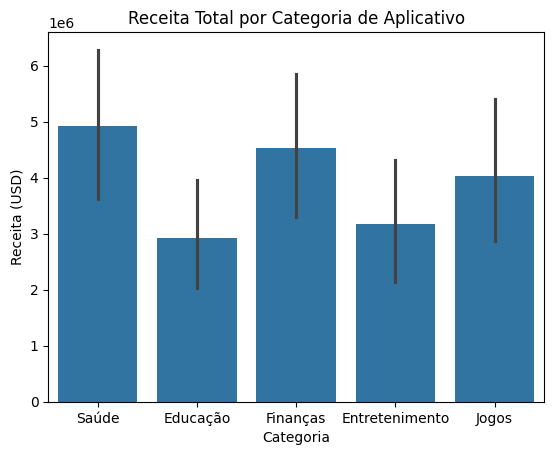

In [22]:
#Crie um gráfico de barras comparando o total de receita por categoria.
sns.barplot(df, x="categoria", y="receita_usd")
plt.title("Receita Total por Categoria de Aplicativo")
plt.ylabel("Receita (USD)")
plt.xlabel("Categoria")
plt.show()

In [34]:
#Crie um modelo para prever se o app será um sucesso_alto, com base em:
df_dummies = pd.get_dummies(df[["categoria", "plataforma"]], drop_first=True)

X = pd.concat([df[["avaliacao", "preco_usd", "downloads_mil"]], df_dummies], axis=1)
y = df["sucesso_alto"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9407407407407408
